<a href="https://colab.research.google.com/github/juank2572/codigo-LSTM-MultivariadoJuan-Carlos-Anaya-/blob/main/MODELO_LSTM_MULTIVARIADO_JUAN_ANAYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_excel(ruta_archivo)

# --- Añade esta línea para ver los nombres de las columnas ---
print(df.columns)
# --- O para verlos uno por uno y detectar espacios raros ---
for col in df.columns:
    print(f"'{col}' - Longitud: {len(col)}")
    print(f"Representación: {repr(col)}") # Esto es muy útil para ver caracteres ocultos
# --- Fin de la inspección ---

# Convertir 'Datetime' a datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
# ... el resto de tu código

Index(['Datetime', 'value', 'CONTRATOS DE ENERGIA', 'GENERACION (KW)',
       'CONSUMO  COMBUSTIBLE MBTU'],
      dtype='object')
'Datetime' - Longitud: 8
Representación: 'Datetime'
'value' - Longitud: 5
Representación: 'value'
'CONTRATOS DE ENERGIA' - Longitud: 20
Representación: 'CONTRATOS DE ENERGIA'
'GENERACION (KW)' - Longitud: 15
Representación: 'GENERACION (KW)'
'CONSUMO  COMBUSTIBLE MBTU' - Longitud: 25
Representación: 'CONSUMO  COMBUSTIBLE MBTU'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 18)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 48, 128)   │      7,040 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 48, 128)   │        512 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 48, 256)   │    263,168 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 256)   │      1,024 │ bidirectional[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 48, 256)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 256, 48)   │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256, 48)   │      2,352 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_1 (Permute) │ (None, 48, 256)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 48, 256)   │          0 │ dropout_1[0][0],  │
│                     │                   │            │ permute_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 48, 128)   │    164,352 │ multiply[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 48, 128)   │        512 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 48, 128)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 32)        │     20,608 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 16)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         17 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 460,113 (1.76 MB)

 Trainable params: 459,089 (1.75 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 65s 24ms/step - loss: 0.0051 - val_loss: 0.0049 - learning_rate: 5.0000e-04
Epoch 2/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - loss: 6.9125e-04 - val_loss: 0.0041 - learning_rate: 5.0000e-04
Epoch 3/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - loss: 5.5367e-04 - val_loss: 0.0031 - learning_rate: 5.0000e-04
Epoch 4/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 85s 24ms/step - loss: 4.9402e-04 - val_loss: 0.0030 - learning_rate: 5.0000e-04
Epoch 5/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 5.1841e-04 - val_loss: 0.0035 - learning_rate: 5.0000e-04
Epoch 6/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 53s 24ms/step - loss: 4.9338e-04 - val_loss: 0.0030 - learning_rate: 5.0000e-04
Epoch 7/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - loss: 4.3618e-04 - val_loss: 0.0034 - learning_rate: 5.0000e-04
Epoch 8/150
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - loss: 4.4931e-04 - val_loss: 0.0029 - learning_rate: 5.0000e-04
Epoch 9/150
2186/218

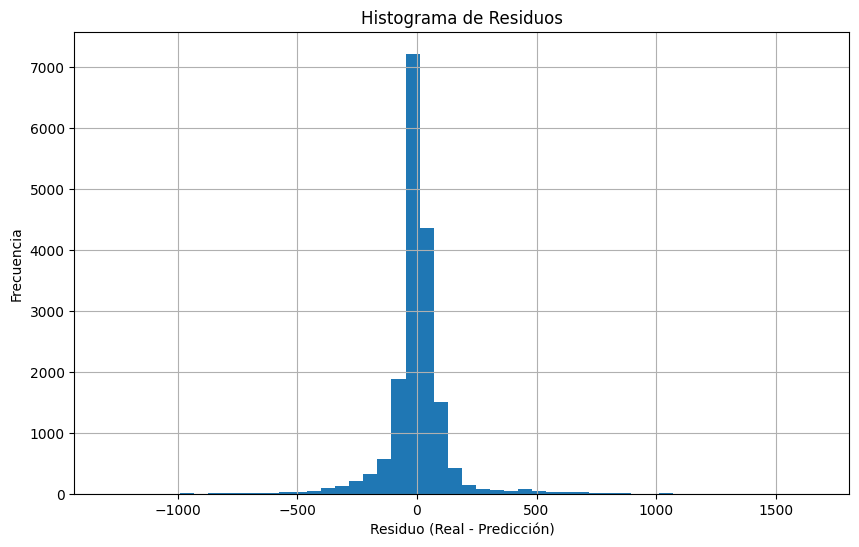

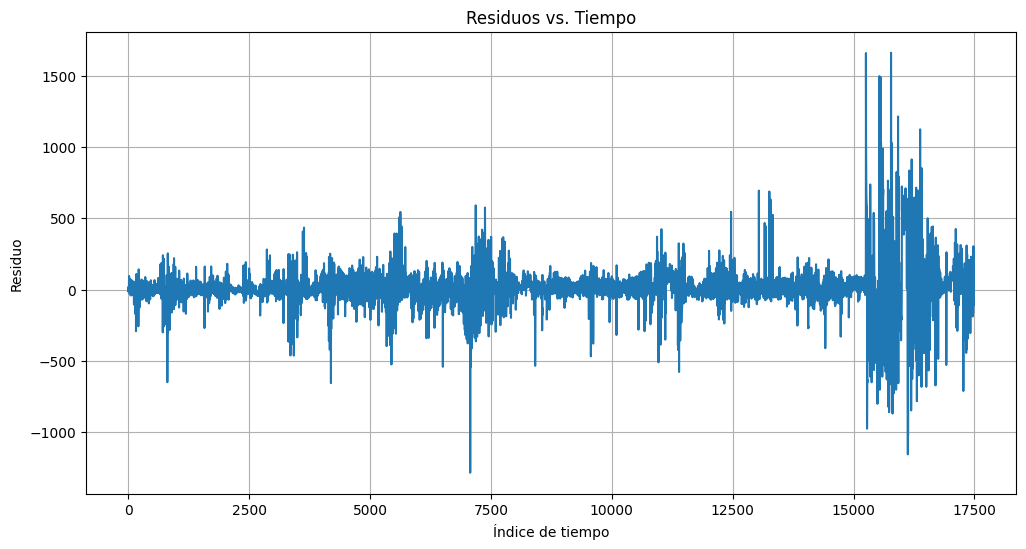

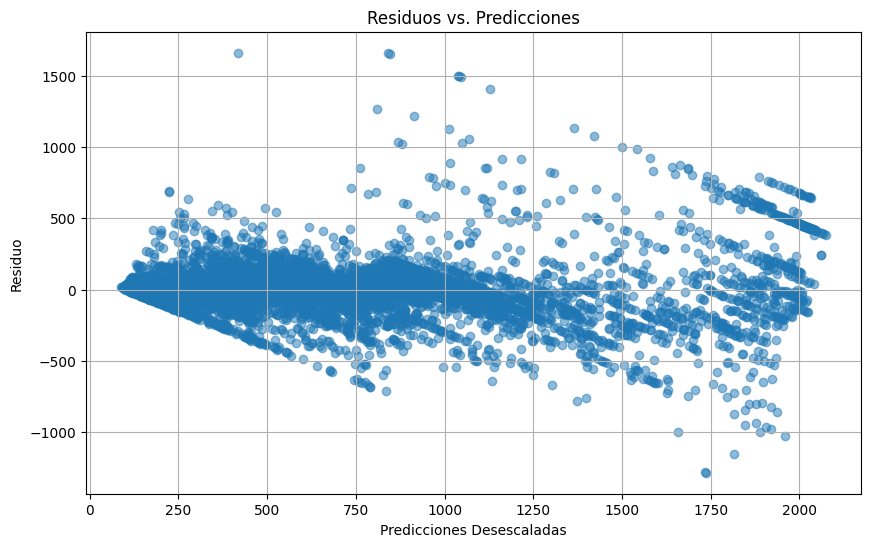


--- Autocorrelación de Residuos ---


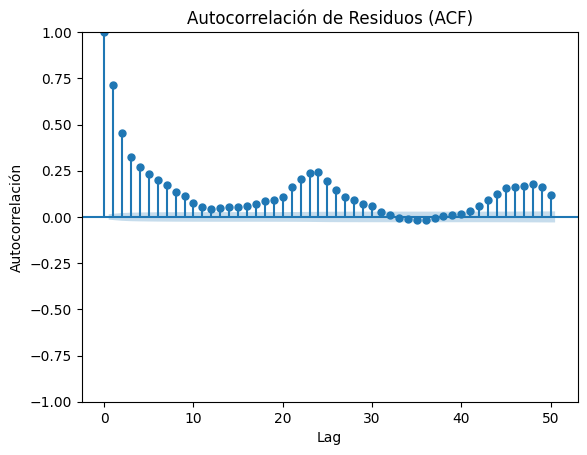

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


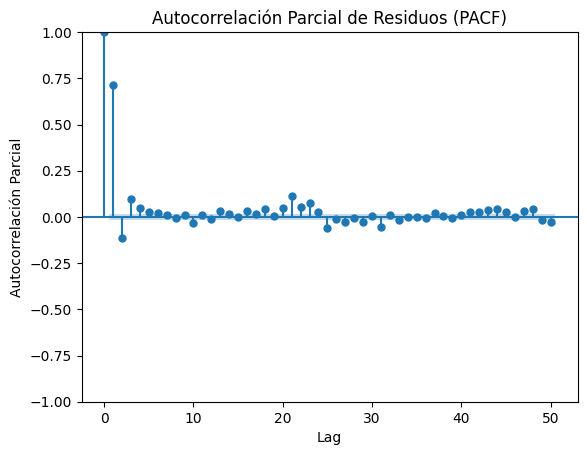

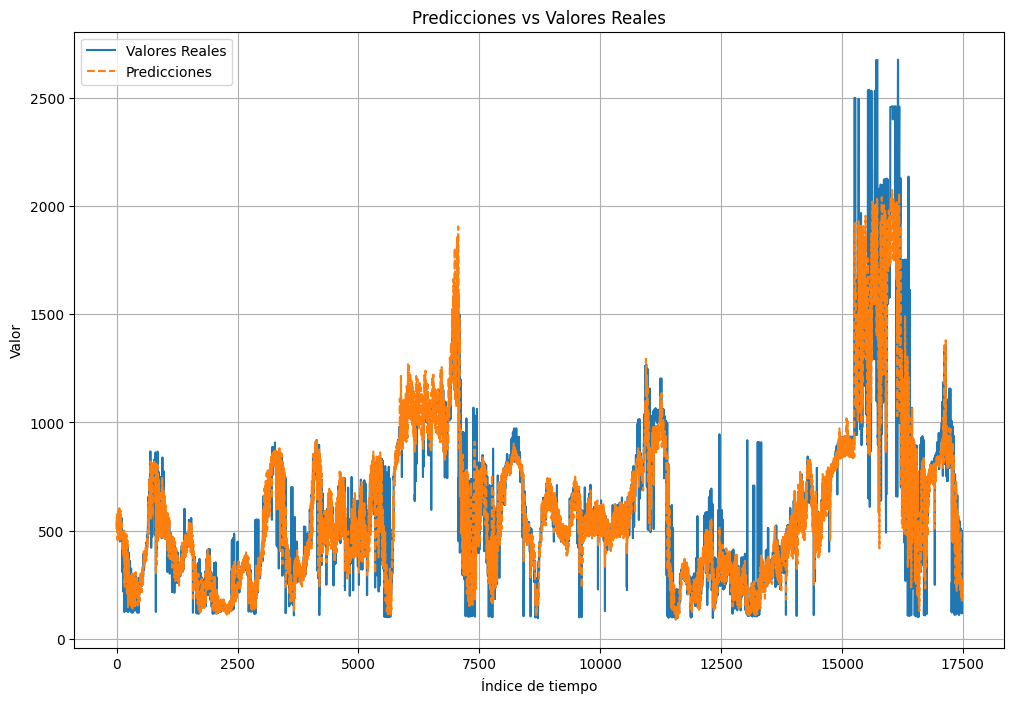

In [ ]:
# -------------------------------------------------
# 1. Importar librerías necesarias
# -------------------------------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
# Importar capas específicas del modelo para claridad
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Multiply, Permute, Bidirectional
from tensorflow.keras.optimizers import Adam
# Importar Callbacks para el entrenamiento
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Importar herramientas de preprocesamiento y evaluación
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
# Importar matplotlib para visualización
import matplotlib.pyplot as plt
# Asegura que statsmodels esté instalado en la versión deseada
# La advertencia sobre plotnine se puede ignorar si no usas plotnine.
!pip install statsmodels==0.13.5

# -------------------------------------------------
# 2. Cargar y preparar datos (Mejorado con cíclicas y lags)
# -------------------------------------------------
# Montar Google Drive para acceder al archivo
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta del archivo de datos
ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/DATA_ENERGIAMULTIVARIABLE_FINAL.xlsx'
# Cargar los datos desde el archivo Excel a un DataFrame de pandas
df = pd.read_excel(ruta_archivo)

# --- Verificar y corregir nombres de columnas (IMPORTANTE) ---
# Según tu `print(df.columns)` y `repr(col)`, el nombre exacto es 'CONSUMO  COMBUSTIBLE MBTU'
# Reemplazamos el nombre problemático con uno más limpio para evitar errores futuros.
# Si el nombre exacto en tu Excel fuera ligeramente diferente, ajusta la primera parte del diccionario.
df = df.rename(columns={'CONSUMO  COMBUSTIBLE MBTU': 'CONSUMO_COMBUSTIBLE_MBTU'})

# Convertir la columna 'Datetime' a formato datetime para facilitar la extracción de características temporales
df['Datetime'] = pd.to_datetime(df['Datetime'])

# --- Variables Temporales y Cíclicas ---
# Extraer la hora, el día de la semana y el mes de la columna Datetime
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month # Extraer el mes

# Crear características cíclicas (seno y coseno) para la hora, el día de la semana y el mes.
# Esto ayuda al modelo a entender la naturaleza cíclica de estas variables.
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# --- Variables Derivadas ---
# Ahora usamos el nombre corregido de la columna: 'CONSUMO_COMBUSTIBLE_MBTU'
# Calcular la media móvil de 3 periodos para 'CONSUMO_COMBUSTIBLE_MBTU'
df['consumo_comb_mavg3'] = df['CONSUMO_COMBUSTIBLE_MBTU'].rolling(window=3).mean()
# Calcular la diferencia (cambio) entre periodos consecutivos para 'CONSUMO_COMBUSTIBLE_MBTU'
df['consumo_comb_diff'] = df['CONSUMO_COMBUSTIBLE_MBTU'].diff()
# Crear una variable de interacción multiplicando 'CONSUMO_COMBUSTIBLE_MBTU' y 'GENERACION (KW)'
df['consumo_gen_interaction'] = df['CONSUMO_COMBUSTIBLE_MBTU'] * df['GENERACION (KW)']

# --- Retrasos (Lag Features) para la variable objetivo (Optimizados) ---
# Lags clave para patrones horarios, diarios y semanales.
# Estos son valores pasados de la variable objetivo ('value') que pueden ser predictores útiles.
lag_periods = [1, 2, 3, 24, 48, 168]
for lag in lag_periods:
    df[f'value_lag_{lag}'] = df['value'].shift(lag)

# Eliminar filas con valores NaN causados por las operaciones de rolling, diff y shift al inicio del DataFrame
df = df.dropna().reset_index(drop=True)

# Definir las columnas que se usarán como características (X) y la columna objetivo (y)
features_cols = [
    'CONTRATOS DE ENERGIA',
    'GENERACION (KW)',
    'CONSUMO_COMBUSTIBLE_MBTU', # Usamos el nombre corregido aquí también
    'consumo_comb_mavg3',
    'consumo_comb_diff',
    'consumo_gen_interaction',
    'hour_sin',
    'hour_cos',
    'dayofweek_sin',
    'dayofweek_cos',
    'month_sin',
    'month_cos'
] + [f'value_lag_{lag}' for lag in lag_periods] # Añadir las columnas de lag a las características

features = df[features_cols]
target = df['value']

# Escalar las características y el objetivo a un rango entre 0 y 1.
# Esto es importante para las redes neuronales. Se usan escaladores separados.
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1)) # Reshape es necesario para el scaler

# -------------------------------------------------
# 3. Crear secuencias para LSTM
# -------------------------------------------------

time_steps = 48 # Define la longitud de la ventana de tiempo de entrada para el modelo (cuántas horas pasadas se usan para predecir la siguiente). Mantén 48 o ajusta si tus patrones temporales son más largos/cortos.
# Función para crear secuencias de datos y etiquetas para un modelo de series de tiempo.
# Cada secuencia X es una ventana de `time_steps` de características, y el target y es el valor futuro.
def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Crear las secuencias de entrenamiento y prueba a partir de los datos escalados
X, y = create_sequences(features_scaled, target_scaled, time_steps)

# Dividir los datos en conjuntos de entrenamiento y prueba.
# `shuffle=False` es crucial para datos de series de tiempo para mantener el orden cronológico.
test_size = 0.2 # 20% de los datos se usarán para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

# -------------------------------------------------
# 4. Definir capa de atención simple
# -------------------------------------------------
# Define un bloque de atención 1D que permite al modelo ponderar diferentes pasos de tiempo en la secuencia de entrada.
def attention_1d_block(inputs):
    # Obtener las dimensiones de la entrada
    time_steps = int(inputs.shape[1])
    input_dim = int(inputs.shape[2])

    # Permutar las dimensiones para aplicar la capa Dense sobre los pasos de tiempo
    a = Permute((2, 1))(inputs)
    # Aplicar una capa Dense con activación softmax para obtener pesos de atención para cada paso de tiempo
    a = Dense(time_steps, activation='softmax')(a)
    # Permutar de vuelta a la forma original
    a_probs = Permute((2, 1))(a)

    # Multiplicar la entrada original por los pesos de atención para ponderar la información
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# -------------------------------------------------
# 5. Construir el modelo CNN + LSTM (Bidireccional) + Atención (Ajustado)
# -------------------------------------------------
# Definir la capa de entrada con la forma de las secuencias de entrenamiento
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Capa CNN para extraer características locales y patrones a corto plazo
x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x) # Normalización para estabilizar el entrenamiento
x = Dropout(0.2)(x) # Dropout para evitar sobreajuste

# Primera capa LSTM Bidireccional para capturar dependencias temporales en ambas direcciones
x = Bidirectional(LSTM(128, return_sequences=True))(x) # return_sequences=True para pasar la secuencia completa a la siguiente capa
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Aplicar el bloque de atención definido anteriormente
x = attention_1d_block(x)

# Segunda capa LSTM Bidireccional con menos unidades
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Capa LSTM final que resume la información temporal de la secuencia
x = LSTM(32)(x) # return_sequences=False para obtener solo la salida del último paso
x = Dropout(0.2)(x)

# Capa densa adicional para refinar la salida antes de la capa final
x = Dense(16, activation='relu')(x)
x = Dropout(0.1)(x)

# Capa de salida con una sola unidad (para predecir un valor continuo)
output = Dense(1)(x)

# Crear el modelo combinando las capas de entrada y salida
model = Model(inputs=input_layer, outputs=output)

# Compilación del modelo
# Usar el optimizador Adam y el error cuadrático medio como función de pérdida (adecuado para regresión)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Mostrar un resumen de la arquitectura del modelo
model.summary()

# -------------------------------------------------
# 6. Entrenar el modelo
# -------------------------------------------------
# Definir Callbacks para controlar el entrenamiento
# EarlyStopping: Detiene el entrenamiento si la pérdida de validación no mejora después de `patience` épocas.
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
# ReduceLROnPlateau: Reduce la tasa de aprendizaje si la pérdida de validación deja de mejorar.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, min_lr=1e-7)

# Definir los parámetros de entrenamiento
epochs = 150 # Número máximo de épocas
batch_size = 32 # Tamaño del lote

# Entrenar el modelo usando los datos de entrenamiento y validación
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test), # Usar el conjunto de prueba como validación
    callbacks=[early_stopping, reduce_lr], # Aplicar los Callbacks definidos
    verbose=1 # Mostrar el progreso del entrenamiento
)

# -------------------------------------------------
# 7. Evaluar el modelo
# -------------------------------------------------
# Evaluar el modelo en el conjunto de prueba para obtener la pérdida final
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
# Desescalar las predicciones y los valores reales del conjunto de prueba a la escala original
predictions_descaled = scaler_target.inverse_transform(predictions)
y_test_descaled = scaler_target.inverse_transform(y_test)

# Calcular métricas de evaluación comunes para regresión
mape = mean_absolute_percentage_error(y_test_descaled, predictions_descaled)
rmse = np.sqrt(mean_squared_error(y_test_descaled, predictions_descaled))
mae = mean_absolute_error(y_test_descaled, predictions_descaled)

print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


# -------------------------------------------------
# 8. Análisis de Residuos
# -------------------------------------------------

# Calcular los residuos (errores): diferencia entre los valores reales y las predicciones desescaladas
residuals = y_test_descaled - predictions_descaled

print("\n--- Análisis de Residuos ---")

# Estadísticas básicas de los residuos para entender su distribución
print(f"Media de los residuos: {np.mean(residuals):.4f}")
print(f"Desviación estándar de los residuos: {np.std(residuals):.4f}")
print(f"Residuo mínimo: {np.min(residuals):.4f}")
print(f"Residuo máximo: {np.max(residuals):.4f}")

# Histograma de residuos para visualizar la distribución de los errores.
# Idealmente, debería parecerse a una distribución normal centrada en cero.
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.title('Histograma de Residuos')
plt.xlabel('Residuo (Real - Predicción)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Gráfico de Residuos vs. Tiempo para detectar patrones temporales en los errores.
# Si hay patrones, podría indicar que al modelo le falta capturar alguna dinámica temporal.
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos vs. Tiempo')
plt.xlabel('Índice de tiempo')
plt.ylabel('Residuo')
plt.grid(True)
plt.show()

# Gráfico de Residuos vs. Valores Predichos para verificar si la varianza de los errores es constante (homocedasticidad).
# Una forma de embudo podría indicar heterocedasticidad.
plt.figure(figsize=(10, 6))
plt.scatter(predictions_descaled, residuals, alpha=0.5)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones Desescaladas')
plt.ylabel('Residuo')
plt.grid(True)
plt.show()

# Autocorrelación de Residuos: para verificar si los errores en un momento dado están correlacionados con errores pasados.
# La autocorrelación significativa indica que hay información en los residuos que el modelo no ha capturado.
print("\n--- Autocorrelación de Residuos ---")
lags_to_show = 50 # Número de lags a mostrar en los gráficos de autocorrelación

# Gráfico de Autocorrelación (ACF): muestra la correlación entre los residuos y sus valores rezagados.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=lags_to_show)
plt.title('Autocorrelación de Residuos (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.show()

# Gráfico de Autocorrelación Parcial (PACF): muestra la correlación entre los residuos y sus valores rezagados, después de remover la influencia de los lags intermedios.
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(residuals, lags=lags_to_show)
plt.title('Autocorrelación Parcial de Residuos (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación Parcial')
plt.show()

# -------------------------------------------------
# 9. Graficar resultados
# -------------------------------------------------
# Graficar los valores reales del conjunto de prueba y las predicciones del modelo para visualizar el rendimiento.
plt.figure(figsize=(12,8))
plt.plot(y_test_descaled, label='Valores Reales')
plt.plot(predictions_descaled, label='Predicciones', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

El modelo ya está en memoria (desde el entrenamiento).

Iniciando la predicción de 480 horas futuras...
Predicciones futuras generadas.


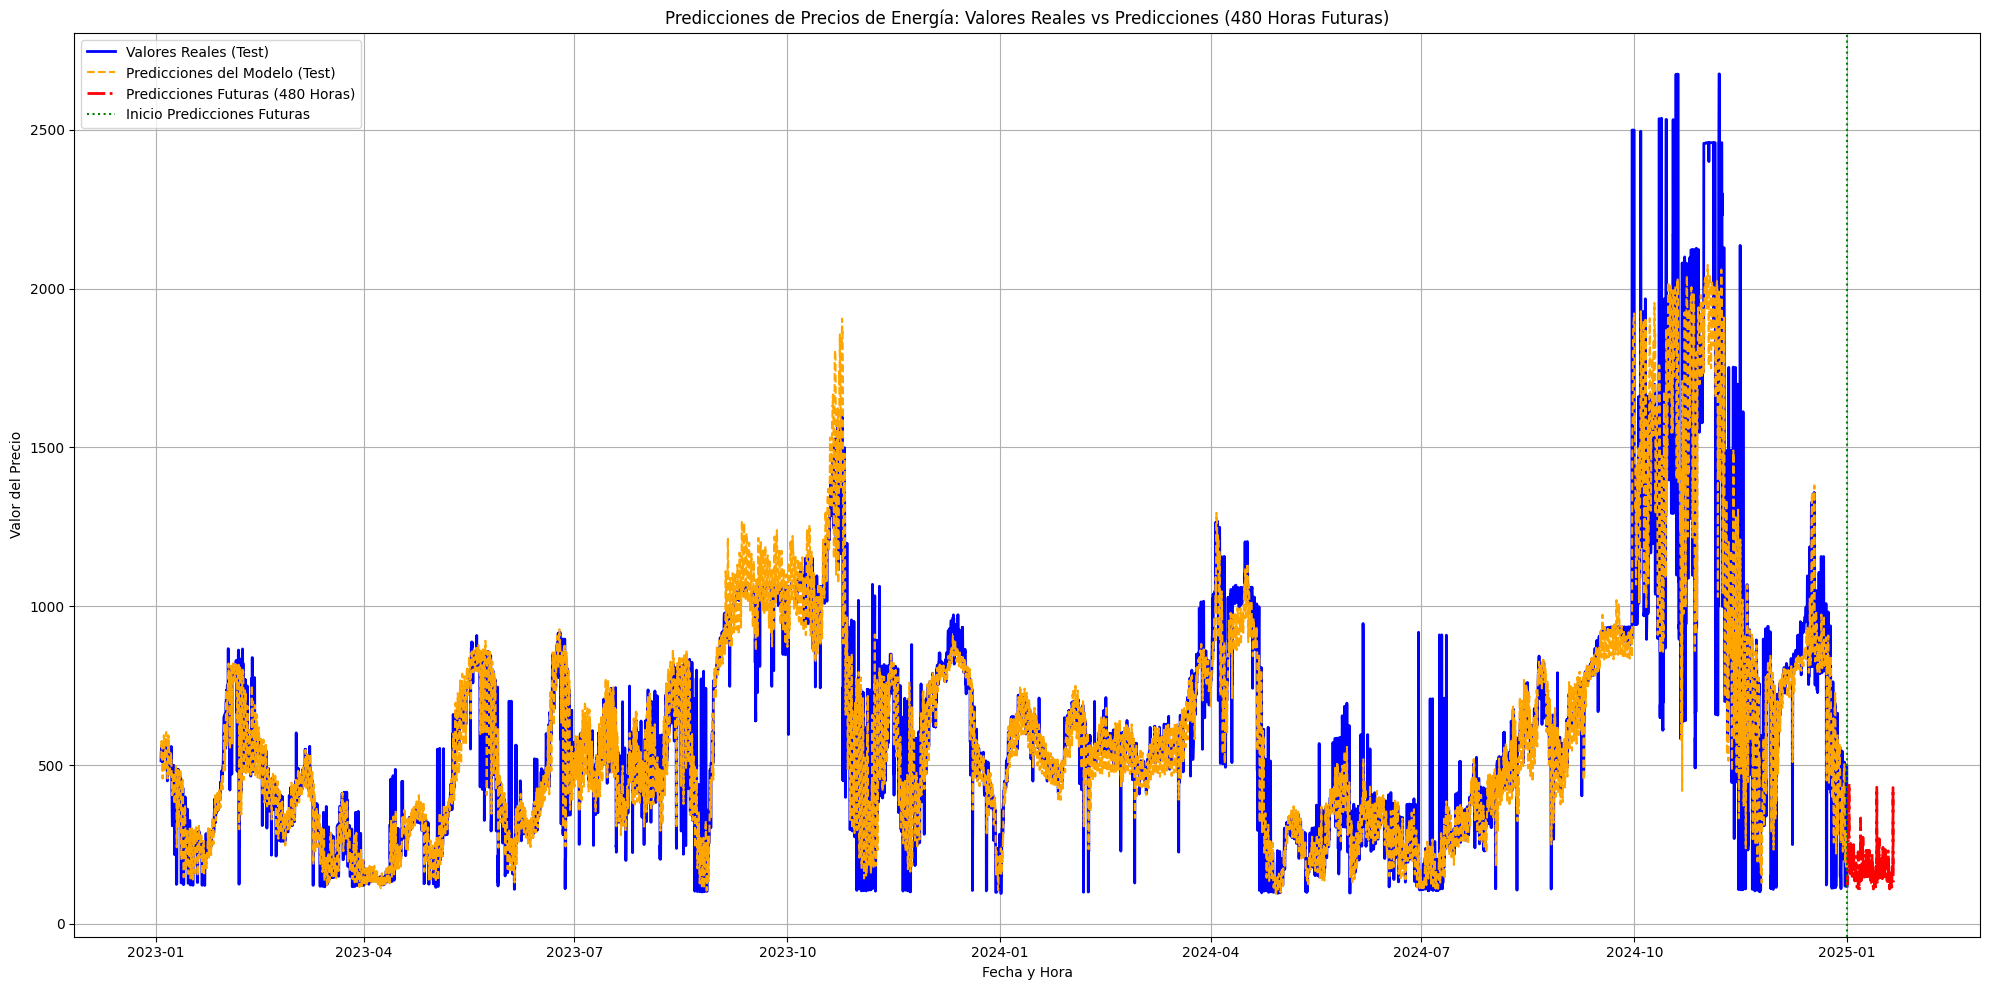


--- NOTA IMPORTANTE SOBRE LA PRECISIÓN DE PREDICCIONES A LARGO PLAZO ---
La precisión de las predicciones a 20 días puede ser baja debido a:
1. **Propagación del Error:** Los pequeños errores se acumulan en cada paso iterativo.
2. **Variables Exógenas:** Se asumió que 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', y 'CONSUMO_COMBUSTIBLE_MBTU' (y sus derivados) permanecen constantes en sus últimos valores conocidos. Para predicciones precisas a largo plazo, ¡necesitarías pronósticos de estas variables también!
3. **Eventos No Modelados:** El modelo no puede predecir eventos futuros inesperados (cambios económicos, eventos climáticos extremos, fallas de infraestructura, etc.).

--- NOTA IMPORTANTE SOBRE LA PRECISIÓN DE PREDICCIONES A LARGO PLAZO ---
La precisión de las predicciones a 20 días puede ser baja debido a:
1. **Propagación del Error:** Los pequeños errores se acumulan en cada paso iterativo.
2. **Variables Exógenas:** Se asumió que 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', y 'CON

In [ ]:
# Asegúrate de haber ejecutado todo el código anterior (carga de datos, preprocesamiento,
# definición de la función attention_1d_block, construcción del modelo, entrenamiento y evaluación)
# antes de ejecutar este bloque.

# -------------------------------------------------
# 8. Carga del Modelo (Si no está en memoria) y Definición de Atención
#    Esto es crucial si ejecutas esta celda por separado en una nueva sesión de Colab
# -------------------------------------------------

# Asegúrate de que la función de atención esté definida antes de cargar el modelo
def attention_1d_block(inputs):
    time_steps = int(inputs.shape[1])
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    a_probs = Permute((2, 1))(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# Ruta donde guardaste tu modelo. Asegúrate de que coincida.
ruta_cargar_modelo = '/content/drive/MyDrive/Colab Notebooks/modelos_energia/modelo_precios_energia_v1.h5'

# Cargar el modelo. Si ya lo entrenaste en la misma sesión, es posible que ya esté en memoria.
# Si no, esta línea lo cargará.
try:
    # Verificamos si el modelo ya está definido (desde el entrenamiento)
    if 'model' not in locals() or model is None:
        model = tf.keras.models.load_model(ruta_cargar_modelo, custom_objects={'attention_1d_block': attention_1d_block})
        print(f"Modelo cargado exitosamente desde: {ruta_cargar_modelo}")
    else:
        print("El modelo ya está en memoria (desde el entrenamiento).")
except Exception as e:
    print(f"Error al cargar el modelo: {e}. Asegúrate de que la función 'attention_1d_block' esté definida antes de cargar el modelo y que la ruta sea correcta.")
    print("Por favor, entrena y guarda el modelo primero si aún no lo has hecho.")
    # Si el modelo no se pudo cargar, no podemos continuar con la predicción.
    raise RuntimeError("No se pudo cargar el modelo. Deteniendo la ejecución.")

# -------------------------------------------------
# 9. Predicción de 480 Datos Futuros (20 Días)
# -------------------------------------------------

n_future_steps = 480 # 20 días * 24 horas/día
time_steps = 48 # Tu ventana de entrada actual para el modelo

# Obtener la última secuencia de entrada del dataset completo para empezar la predicción futura.
# features_scaled y df deben estar disponibles desde tu ejecución anterior.
last_sequence_full_data = features_scaled[-time_steps:] # Las últimas 48 filas de tus características escaladas

# Obtener la última fecha y hora de tu DataFrame original para empezar a generar fechas futuras
last_datetime_in_df = df['Datetime'].iloc[-1]

# Lista para almacenar las predicciones futuras (desescaladas)
future_predictions_descaled = []
# Lista para almacenar las fechas y horas futuras correspondientes
future_datetimes = []

# Mantener un historial de los 'value' (reales y predichos) para calcular los lags.
# max_lag es la mayor de tus periodos de lag (en tu caso, 168).
max_lag = max(lag_periods)
# Inicializar con los últimos `max_lag` valores *escalados* del objetivo (y_scaled)
# Estos serán los 'value_lag_X' para la primera predicción futura.
# Asegúrate de que target_scaled sea la versión escalada de la columna 'value'
value_history_for_lags_scaled = target_scaled[-max_lag:].flatten().tolist()

# Crear un mapa de nombres de características a sus índices para facilitar la construcción de la entrada
# Esto asume que `features_cols` es el mismo que usaste para el entrenamiento
feature_name_to_index = {name: i for i, name in enumerate(features_cols)}

# Copia de la última secuencia para modificarla iterativamente
current_input_sequence_for_model = last_sequence_full_data.copy()

print(f"\nIniciando la predicción de {n_future_steps} horas futuras...")

for i in range(n_future_steps):
    # 1. Realizar la predicción para la siguiente hora
    # Reshape para que coincida con la entrada del modelo (batch_size, time_steps, n_features)
    input_for_prediction = current_input_sequence_for_model.reshape(1, time_steps, current_input_sequence_for_model.shape[1])
    predicted_value_scaled = model.predict(input_for_prediction, verbose=0)[0][0] # verbose=0 para no imprimir cada predicción

    # Desescalar la predicción para almacenarla
    predicted_value_descaled = scaler_target.inverse_transform(np.array(predicted_value_scaled).reshape(-1, 1))[0][0]
    future_predictions_descaled.append(predicted_value_descaled)

    # 2. Generar la fecha y hora para esta predicción futura
    next_datetime = last_datetime_in_df + pd.Timedelta(hours=i+1)
    future_datetimes.append(next_datetime)

    # 3. Preparar la nueva secuencia de entrada para la próxima predicción
    # Se construye un nuevo vector de características para la hora `t+1`
    next_feature_vector_scaled = np.zeros(current_input_sequence_for_model.shape[1])

    # Rellenar características no-lag
    # a) Características cíclicas (hora, día de la semana, mes) - se calculan para la nueva fecha
    next_feature_vector_scaled[feature_name_to_index['hour_sin']] = np.sin(2 * np.pi * next_datetime.hour / 24)
    next_feature_vector_scaled[feature_name_to_index['hour_cos']] = np.cos(2 * np.pi * next_datetime.hour / 24)
    next_feature_vector_scaled[feature_name_to_index['dayofweek_sin']] = np.sin(2 * np.pi * next_datetime.dayofweek / 7)
    next_feature_vector_scaled[feature_name_to_index['dayofweek_cos']] = np.cos(2 * np.pi * next_datetime.dayofweek / 7)
    next_feature_vector_scaled[feature_name_to_index['month_sin']] = np.sin(2 * np.pi * next_datetime.month / 12)
    next_feature_vector_scaled[feature_name_to_index['month_cos']] = np.cos(2 * np.pi * next_datetime.month / 12)

    # b) Otras características exógenas (`CONTRATOS DE ENERGIA`, etc.)
    #    ASUNCIÓN CLAVE: Se mantienen constantes en su último valor conocido del dataset original.
    #    Para mayor precisión, necesitarías pronósticos de estas variables.
    next_feature_vector_scaled[feature_name_to_index['CONTRATOS DE ENERGIA']] = features_scaled[-1, feature_name_to_index['CONTRATOS DE ENERGIA']]
    next_feature_vector_scaled[feature_name_to_index['GENERACION (KW)']] = features_scaled[-1, feature_name_to_index['GENERACION (KW)']]
    next_feature_vector_scaled[feature_name_to_index['CONSUMO_COMBUSTIBLE_MBTU']] = features_scaled[-1, feature_name_to_index['CONSUMO_COMBUSTIBLE_MBTU']]

    # c) Características derivadas de consumo/generación (mavg3, diff, interaction)
    #    ASUNCIÓN CLAVE: También se mantienen constantes en su último valor conocido escalado.
    #    Requerirían lógica compleja si sus valores futuros no son constantes.
    next_feature_vector_scaled[feature_name_to_index['consumo_comb_mavg3']] = features_scaled[-1, feature_name_to_index['consumo_comb_mavg3']]
    next_feature_vector_scaled[feature_name_to_index['consumo_comb_diff']] = features_scaled[-1, feature_name_to_index['consumo_comb_diff']]
    next_feature_vector_scaled[feature_name_to_index['consumo_gen_interaction']] = features_scaled[-1, feature_name_to_index['consumo_gen_interaction']]

    # d) Actualizar el historial de 'value' para los lags
    # El valor predicho actualmente se añade al historial
    value_history_for_lags_scaled.append(predicted_value_scaled)
    # Si el historial excede el tamaño máximo de lag, se elimina el valor más antiguo
    if len(value_history_for_lags_scaled) > max_lag:
        value_history_for_lags_scaled.pop(0)

    # e) Rellenar las características de lag del 'value' para el nuevo vector de características
    for lag in lag_periods:
        # El índice en el historial es `max_lag - lag` porque el historial se mantiene ordenado del más antiguo al más reciente.
        # Por ejemplo, value_lag_1 será el último elemento del historial, value_lag_2 el penúltimo, etc.
        # Asegurarse de que el lag solicitado esté dentro del historial disponible
        if max_lag - lag >= 0:
            next_feature_vector_scaled[feature_name_to_index[f'value_lag_{lag}']] = value_history_for_lags_scaled[max_lag - lag]
        # else: Si un lag específico es mayor que el max_lag, se puede poner un valor por defecto (ej. 0 o NaN)
        # Esto no debería ocurrir si `max_lag = max(lag_periods)`

    # 4. Desplazar la secuencia de entrada: eliminar el punto más antiguo y añadir el nuevo vector
    current_input_sequence_for_model = np.vstack([current_input_sequence_for_model[1:], next_feature_vector_scaled])

print("Predicciones futuras generadas.")

# -------------------------------------------------
# 10. Graficar los Resultados: Datos Reales (Test), Predicciones (Test) y Predicciones Futuras
# -------------------------------------------------

# Obtener los Datetime correspondientes al conjunto de prueba
# Esto asume que `X_train`, `X_test`, `time_steps`, y `df` están disponibles
start_datetime_test = df['Datetime'].iloc[len(X_train) + time_steps]
test_datetimes = pd.to_datetime([start_datetime_test + pd.Timedelta(hours=i) for i in range(len(y_test_descaled))])

# 1. Serie de valores reales del conjunto de prueba
actual_values_test_series = pd.Series(y_test_descaled.flatten(), index=test_datetimes)

# 2. Serie de predicciones del conjunto de prueba
# `predictions_descaled` debe ser el resultado de `model.predict(X_test)` desescalado
predictions_test_series = pd.Series(predictions_descaled.flatten(), index=test_datetimes)

# 3. Serie de predicciones futuras
# --- LÍNEA CORREGIDA AQUÍ ---
future_predictions_series = pd.Series(np.array(future_predictions_descaled).flatten(), index=future_datetimes)
# --- FIN DE LA LÍNEA CORREGIDA ---

plt.figure(figsize=(20, 10)) # Aumenta el tamaño para ver mejor los 20 días

# Graficar los Valores Reales del conjunto de prueba (un color)
plt.plot(actual_values_test_series.index, actual_values_test_series.values,
         label='Valores Reales (Test)', color='blue', linewidth=2)

# Graficar las Predicciones del conjunto de prueba (otro color)
plt.plot(predictions_test_series.index, predictions_test_series.values,
         label='Predicciones del Modelo (Test)', color='orange', linestyle='--', linewidth=1.5)

# Graficar las Predicciones Futuras (un tercer color o un estilo distinto)
plt.plot(future_predictions_series.index, future_predictions_series.values,
         label=f'Predicciones Futuras ({n_future_steps} Horas)', color='red', linestyle='-.', linewidth=2)

# Línea vertical para marcar el punto donde terminan los datos reales de prueba y comienzan las predicciones futuras
if future_datetimes:
    plt.axvline(x=future_datetimes[0], color='green', linestyle=':', label='Inicio Predicciones Futuras', linewidth=1.5)

plt.title(f'Predicciones de Precios de Energía: Valores Reales vs Predicciones ({n_future_steps} Horas Futuras)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Valor del Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- NOTA IMPORTANTE SOBRE LA PRECISIÓN DE PREDICCIONES A LARGO PLAZO ---")
print("La precisión de las predicciones a 20 días puede ser baja debido a:")
print("1. **Propagación del Error:** Los pequeños errores se acumulan en cada paso iterativo.")
print("2. **Variables Exógenas:** Se asumió que 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', y 'CONSUMO_COMBUSTIBLE_MBTU' (y sus derivados) permanecen constantes en sus últimos valores conocidos. Para predicciones precisas a largo plazo, ¡necesitarías pronósticos de estas variables también!")
print("3. **Eventos No Modelados:** El modelo no puede predecir eventos futuros inesperados (cambios económicos, eventos climáticos extremos, fallas de infraestructura, etc.).")

print("\n--- NOTA IMPORTANTE SOBRE LA PRECISIÓN DE PREDICCIONES A LARGO PLAZO ---")
print("La precisión de las predicciones a 20 días puede ser baja debido a:")
print("1. **Propagación del Error:** Los pequeños errores se acumulan en cada paso iterativo.")
print("2. **Variables Exógenas:** Se asumió que 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', y 'CONSUMO_COMBUSTIBLE_MBTU' (y sus derivados) permanecen constantes en sus últimos valores conocidos. Para predicciones precisas a largo plazo, ¡necesitarías pronósticos de estas variables también!")
print("3. **Eventos No Modelados:** El modelo no puede predecir eventos futuros inesperados (cambios económicos, eventos climáticos extremos, fallas de infraestructura, etc.).")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Permute, Dense, Multiply
# Asegúrate de que todas tus funciones personalizadas y scalers estén disponibles (ej. attention_1d_block, scaler_target)
# Y que las variables globales como df, features_scaled, target_scaled, X_train, y_test_descaled,
# predictions_descaled, features_cols, lag_periods, time_steps estén cargadas o definidas.

from google.colab import drive
drive.mount('/content/drive')

# -------------------------------------------------
# 8. Carga del Modelo (Si no está en memoria) y Definición de Atención
#    Esto es crucial si ejecutas esta celda por separado en una nueva sesión de Colab
# -------------------------------------------------

# Asegúrate de que la función de atención esté definida antes de cargar el modelo
def attention_1d_block(inputs):
    time_steps = int(inputs.shape[1])
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    a_probs = Permute((2, 1))(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# Ruta donde guardaste tu modelo. Asegúrate de que coincida.
ruta_cargar_modelo = '/content/drive/MyDrive/Colab Notebooks/modelos_energia/modelo_precios_energia_v1.h5'

# Cargar el modelo. Si ya lo entrenaste en la misma sesión, es posible que ya esté en memoria.
try:
    if 'model' not in locals() or model is None: # Verifica si 'model' no existe o es None
        model = tf.keras.models.load_model(ruta_cargar_modelo, custom_objects={'attention_1d_block': attention_1d_block})
        print(f"Modelo cargado exitosamente desde: {ruta_cargar_modelo}")
    else:
        print("El modelo ya está en memoria (desde el entrenamiento).")
except Exception as e:
    print(f"Error al cargar el modelo: {e}. Asegúrate de que la función 'attention_1d_block' esté definida antes de cargar el modelo y que la ruta sea correcta.")
    print("Por favor, entrena y guarda el modelo primero si aún no lo has hecho.")
    raise RuntimeError("No se pudo cargar el modelo. Deteniendo la ejecución.")


# -------------------------------------------------
# 9. Predicción de 312 Datos Futuros (13 Días)
# -------------------------------------------------

# *** CAMBIO AQUÍ: Número de pasos futuros para 13 días ***
n_future_steps = 13 * 24  # 13 días * 24 horas/día = 312 horas
time_steps = 48 # Tu ventana de entrada actual para el modelo

# Obtener la última secuencia de entrada del dataset completo para empezar la predicción futura.
last_sequence_full_data = features_scaled[-time_steps:]

# Obtener la última fecha y hora de tu DataFrame original para empezar a generar fechas futuras
last_datetime_in_df = df['Datetime'].iloc[-1]

# Lista para almacenar las predicciones futuras (desescaladas)
future_predictions_descaled = []
# Lista para almacenar las fechas y horas futuras correspondientes
future_datetimes = []

# Mantener un historial de los 'value' (reales y predichos) para calcular los lags.
max_lag = max(lag_periods) # max(lag_periods) debería ser 168
# Inicializar con los últimos `max_lag` valores *escalados* del objetivo (y_scaled)
value_history_for_lags_scaled = target_scaled[-max_lag:].flatten().tolist()

# Crear un mapa de nombres de características a sus índices
feature_name_to_index = {name: i for i, name in enumerate(features_cols)}

# Copia de la última secuencia para modificarla iterativamente
current_input_sequence_for_model = last_sequence_full_data.copy()

print(f"\nIniciando la predicción de {n_future_steps} horas futuras ({n_future_steps/24:.0f} días)...")

for i in range(n_future_steps):
    # 1. Realizar la predicción para la siguiente hora
    input_for_prediction = current_input_sequence_for_model.reshape(1, time_steps, current_input_sequence_for_model.shape[1])
    predicted_value_scaled = model.predict(input_for_prediction, verbose=0)[0][0]

    predicted_value_descaled = scaler_target.inverse_transform(np.array(predicted_value_scaled).reshape(-1, 1))[0][0]
    future_predictions_descaled.append(predicted_value_descaled)

    # 2. Generar la fecha y hora para esta predicción futura
    next_datetime = last_datetime_in_df + pd.Timedelta(hours=i+1)
    future_datetimes.append(next_datetime)

    # 3. Preparar la nueva secuencia de entrada para la próxima predicción
    next_feature_vector_scaled = np.zeros(current_input_sequence_for_model.shape[1])

    # Rellenar características no-lag
    next_feature_vector_scaled[feature_name_to_index['hour_sin']] = np.sin(2 * np.pi * next_datetime.hour / 24)
    next_feature_vector_scaled[feature_name_to_index['hour_cos']] = np.cos(2 * np.pi * next_datetime.hour / 24)
    next_feature_vector_scaled[feature_name_to_index['dayofweek_sin']] = np.sin(2 * np.pi * next_datetime.dayofweek / 7)
    next_feature_vector_scaled[feature_name_to_index['dayofweek_cos']] = np.cos(2 * np.pi * next_datetime.dayofweek / 7)
    next_feature_vector_scaled[feature_name_to_index['month_sin']] = np.sin(2 * np.pi * next_datetime.month / 12)
    next_feature_vector_scaled[feature_name_to_index['month_cos']] = np.cos(2 * np.pi * next_datetime.month / 12)

    # Otras características exógenas (se mantienen constantes en su último valor conocido escalado)
    next_feature_vector_scaled[feature_name_to_index['CONTRATOS DE ENERGIA']] = features_scaled[-1, feature_name_to_index['CONTRATOS DE ENERGIA']]
    next_feature_vector_scaled[feature_name_to_index['GENERACION (KW)']] = features_scaled[-1, feature_name_to_index['GENERACION (KW)']]
    next_feature_vector_scaled[feature_name_to_index['CONSUMO_COMBUSTIBLE_MBTU']] = features_scaled[-1, feature_name_to_index['CONSUMO_COMBUSTIBLE_MBTU']]
    next_feature_vector_scaled[feature_name_to_index['consumo_comb_mavg3']] = features_scaled[-1, feature_name_to_index['consumo_comb_mavg3']]
    next_feature_vector_scaled[feature_name_to_index['consumo_comb_diff']] = features_scaled[-1, feature_name_to_index['consumo_comb_diff']]
    next_feature_vector_scaled[feature_name_to_index['consumo_gen_interaction']] = features_scaled[-1, feature_name_to_index['consumo_gen_interaction']]

    # Actualizar el historial de 'value' para los lags
    value_history_for_lags_scaled.append(predicted_value_scaled)
    if len(value_history_for_lags_scaled) > max_lag:
        value_history_for_lags_scaled.pop(0)

    # Rellenar las características de lag del 'value'
    for lag in lag_periods:
        if max_lag - lag >= 0:
            next_feature_vector_scaled[feature_name_to_index[f'value_lag_{lag}']] = value_history_for_lags_scaled[max_lag - lag]
        else:
            next_feature_vector_scaled[feature_name_to_index[f'value_lag_{lag}']] = 0

    # Desplazar la secuencia de entrada: eliminar el punto más antiguo y añadir el nuevo vector
    current_input_sequence_for_model = np.vstack([current_input_sequence_for_model[1:], next_feature_vector_scaled])

print("Predicciones futuras generadas.")

# -------------------------------------------------
# 10. Graficar los Resultados: Datos Reales (Test), Predicciones (Test) y Predicciones Futuras
#     *** MEJORAS VISUALES AQUÍ ***
# -------------------------------------------------

# Obtener los Datetime correspondientes al conjunto de prueba
start_datetime_test = df['Datetime'].iloc[len(X_train) + time_steps]
test_datetimes = pd.to_datetime([start_datetime_test + pd.Timedelta(hours=i) for i in range(len(y_test_descaled))])

# 1. Serie de valores reales del conjunto de prueba
actual_values_test_series = pd.Series(y_test_descaled.flatten(), index=test_datetimes)

# 2. Serie de predicciones del conjunto de prueba
predictions_test_series = pd.Series(predictions_descaled.flatten(), index=test_datetimes)

# 3. Serie de predicciones futuras
future_predictions_series = pd.Series(np.array(future_predictions_descaled).flatten(), index=future_datetimes)

plt.figure(figsize=(20, 10)) # Aumenta el tamaño general de la figura

# --- Definir el rango de visualización ---
# Para 13 días de pronóstico, podemos mostrar los últimos ~5-7 días del test set
# y luego los 13 días de pronóstico.
# Calcular cuántos días queremos mostrar del test set antes del pronóstico.
days_to_show_before_forecast = 7
hours_to_show_before_forecast = days_to_show_before_forecast * 24

# Determinar el punto de inicio de la visualización
# Asegurarse de no ir más allá del inicio del conjunto de prueba.
plot_start_index_test = max(0, len(test_datetimes) - hours_to_show_before_forecast)
plot_start_datetime = test_datetimes[plot_start_index_test]
plot_end_datetime = future_datetimes[-1]


# Graficar los Valores Reales del conjunto de prueba
plt.plot(actual_values_test_series.loc[plot_start_datetime:].index,
         actual_values_test_series.loc[plot_start_datetime:].values,
         label='Valores Reales (Test)', color='blue', linewidth=2)

# Graficar las Predicciones del conjunto de prueba
plt.plot(predictions_test_series.loc[plot_start_datetime:].index,
         predictions_test_series.loc[plot_start_datetime:].values,
         label='Predicciones del Modelo (Test)', color='green', linestyle='--', linewidth=1.5, marker='.') # Cambio a verde y marcadores

# Graficar las Predicciones Futuras
plt.plot(future_predictions_series.index, future_predictions_series.values,
         label=f'Predicciones Futuras ({n_future_steps} Horas)', color='red', linestyle='-', linewidth=2) # Línea sólida para futuro

# Línea vertical para marcar el punto donde terminan los datos reales de prueba y comienzan las predicciones futuras
if future_datetimes:
    plt.axvline(x=future_datetimes[0], color='purple', linestyle=':', label='Inicio Predicciones Futuras', linewidth=2)

# --- Resaltar la región de pronóstico ---
# Añadir una banda sombreada para la región de predicción futura
if future_datetimes:
    plt.axvspan(future_datetimes[0], future_datetimes[-1], color='grey', alpha=0.2, label='Región de Pronóstico')

# --- Mejoras de Títulos y Etiquetas ---
plt.title(f'Predicciones de Precios de Energía: Últimos Días de Test y Próximos {n_future_steps/24:.0f} Días', fontsize=16)
plt.xlabel('Fecha y Hora', fontsize=14)
plt.ylabel('Valor del Precio', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# --- Formato del eje X (Fechas) ---
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas de fecha para mejor legibilidad

# --- Ajustar los límites del eje Y para evitar espacio en blanco excesivo ---
# Considera los valores máximos y mínimos de la porción mostrada + un pequeño margen
combined_values = np.concatenate([
    actual_values_test_series.loc[plot_start_datetime:].values,
    predictions_test_series.loc[plot_start_datetime:].values,
    future_predictions_series.values
])
y_min = combined_values.min() * 0.95 # 5% de margen inferior
y_max = combined_values.max() * 1.05 # 5% de margen superior
plt.ylim(y_min, y_max)


plt.tight_layout() # Ajusta el diseño para que no se superpongan los elementos
plt.show()

print("\n--- NOTA IMPORTANTE SOBRE LA PRECISIÓN DE PREDICCIONES A LARGO PLAZO ---")
print("La precisión de las predicciones a 13 días puede ser baja debido a:")
print("1. **Propagación del Error:** Los pequeños errores se acumulan en cada paso iterativo.")
print("2. **Variables Exógenas:** Se asumió que 'CONTRATOS DE ENERGIA', 'GENERACION (KW)', y 'CONSUMO_COMBUSTIBLE_MBTU' (y sus derivados) permanecen constantes en sus últimos valores conocidos. Para predicciones precisas a largo plazo, ¡necesitarías pronósticos de estas variables también!")
print("3. **Eventos No Modelados:** El modelo no puede predecir eventos futuros inesperados (cambios económicos, eventos climáticos extremos, fallas de infraestructura, etc.).")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error al cargar el modelo: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/Colab Notebooks/modelos_energia/modelo_precios_energia_v1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0). Asegúrate de que la función 'attention_1d_block' esté definida antes de cargar el modelo y que la ruta sea correcta.
Por favor, entrena y guarda el modelo primero si aún no lo has hecho.


RuntimeError: No se pudo cargar el modelo. Deteniendo la ejecución.

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/modelos_energia/"